In [15]:
"""
For section 1: You need to write your code in order to regenerate the exact result as shown under each question
For section 2: You need to generate the answers based on the questions without having the sample results.

"""

print(__doc__)


For section 1: You need to write your code in order to regenerate the exact result as shown under each question
For section 2: You need to generate the answers based on the questions without having the sample results.




# Section 1

### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import pandas as pd
import numpy as np

# File to Load (Remember to Change These)
file_to_load = "purchase_data.csv"

# Read Purchasing File and store into Pandas data frame
purchase_data = pd.read_csv(file_to_load)

purchase_data.head()

,Purchase ID,SN,Age,Gender,Item ID,Item Name,Price
0,0,Lisim78,20,Male,108,"Extraction, Quickblade Of Trembling Hands",3.53
1,1,Lisovynya38,40,Male,143,Frenzied Scimitar,1.56
2,2,Ithergue48,24,Male,92,Final Critic,4.88
3,3,Chamassasya86,24,Male,100,Blindscythe,3.27
4,4,Iskosia90,23,Male,131,Fury,1.44


### Q1 - check for missing data

Purchase ID    780
SN             780
Age            780
Gender         780
Item ID        780
Item Name      780
Price          780
dtype: int64

In [3]:
purchase_data.notnull().sum()

Purchase ID    780
SN             780
Age            780
Gender         780
Item ID        780
Item Name      780
Price          780
dtype: int64

## Player Count

### Q2 - Display the total number of players


,Total # of Players
0,576


In [30]:
pd.DataFrame({'Total # of Players': len( pd.unique( purchase_data["SN"] ) ) } ,index = [0])

,Total # of Players
0,576


### Q3- Purchasing Analysis (Total)

* Obtain number of unique items, average price, etc.


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame


,Unique items,Average Price,Total Purchases,Total Revenue
0,183,$3.05,780,$2379.77


In [37]:
pd.DataFrame(
    {
    'Unique items': len( pd.unique( purchase_data["Item ID"] )),
    "Average Price": purchase_data.Price.mean().round(2),
    "Total Purchase": purchase_data["Purchase ID"].count()
    } ,index = [0])

,Unique items,Average Price,Total Purchase
0,183,3.05,780


### Q4- Gender Demographics

* Percentage and Count of Male Players


* Percentage and Count of Female Players


* Percentage and Count of Other / Non-Disclosed




,Count,Percent of Total Players
Male,484,84.03%
Female,81,14.06%
Other / Non-Disclosed,11,1.91%


In [73]:
df1 = purchase_data[["Gender","SN"]].drop_duplicates(subset = "SN")

df2 = df1.groupby("Gender").count()
df2.columns= ["Count"]
df2["Percent of Total Players"] = df2.Count/df2.Count.sum()

# remove index name
df2.index.name = None

df2.sort_values(by="Count", ascending=False)


,Count,Percent of Total Players
Male,484,0.840278
Female,81,0.140625
Other / Non-Disclosed,11,0.019097



### Q5-Purchasing Analysis (Gender)

* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. by gender




* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting




Gender
Female                    361.94
Male                     1967.64
Other / Non-Disclosed      50.19
Name: Price, dtype: float64

In [76]:
purchase_data.groupby("Gender")["Price"].sum()

Gender
Female                    361.94
Male                     1967.64
Other / Non-Disclosed      50.19
Name: Price, dtype: float64

#### Q6-Display the summary data frame

,Number of Players,Purchase Count,Avg Purchase Price,Total Revenue
Female,81,113,$3.20,$361.94
Male,484,652,$3.02,"$1,967.64"
Other / Non-Disclosed,11,15,$3.35,$50.19


In [96]:

df1=purchase_data[["Gender","SN"]].drop_duplicates(subset = "SN").groupby("Gender").count()

df1.rename(columns = {"SN":"Number of Players"})

df1["Purchase Count"]  =purchase_data[["Gender","SN"]].groupby("Gender").count()

df1["Avg Purchase Price"] = purchase_data[["Gender","Price"]].groupby("Gender").mean()

df1["Total Revenue"] = purchase_data[["Gender","Price"]].groupby("Gender").sum()
df1
    
    

,SN,Purchase Count,Avg Purchase Price,Total Revenue
Gender,,,,
Female,81,113,3.203009,361.94
Male,484,652,3.017853,1967.64
Other / Non-Disclosed,11,15,3.346000,50.19


In [174]:
df1 =purchase_data[["Gender","SN"]].groupby("Gender").nunique()
df1["Purchase Count"]  =purchase_data[["Gender","SN"]].groupby("Gender").count()
df1["Avg Purchase Price"] = purchase_data[["Gender","Price"]].groupby("Gender").mean()

df1["Total Revenue"] = purchase_data[["Gender","Price"]].groupby("Gender").sum()

#remove index name
df1.index.name=None
df1

,SN,Purchase Count,Avg Purchase Price,Total Revenue
Female,81,113,3.203009,361.94
Male,484,652,3.017853,1967.64
Other / Non-Disclosed,11,15,3.346000,50.19


### Q7- Age Demographics

* Establish bins for ages


* Categorize the existing players using the age bins. Hint: use pd.cut()


* Calculate the numbers and percentages by age group


* Create a summary data frame to hold the results


* Optional: round the percentage column to two decimal points


* Display Age Demographics Table


,Total Count,Percentage of Players
age_group,,
<10,17,2.95
10-14,22,3.82
15-19,107,18.58
20-24,258,44.79
25-29,77,13.37
30-34,52,9.03
35-39,31,5.38
40+,12,2.08


In [131]:
df1 = purchase_data.drop_duplicates(subset="SN")

bins=[0,9,14,19,24,29,34,39,45]

binss = pd.cut(df1['Age'], bins = bins, labels = ['<10','10-14','15-19','20-24','25-29','30-34','35-39','40+'])

df2 = df1.groupby(binss).count()

df2['Percentage of Players'] = df2.SN*100/df2.SN.sum()

df2[["SN","Percentage of Players"]]

,SN,Percentage of Players
Age,,
<10,17,2.951389
10-14,22,3.819444
15-19,107,18.576389
20-24,258,44.791667
25-29,77,13.368056
30-34,52,9.027778
35-39,31,5.381944
40+,12,2.083333


In [140]:
bins=[0,9,14,19,24,29,34,39,45]

binss = pd.cut(df1['Age'], bins = bins, labels = ['<10','10-14','15-19','20-24','25-29','30-34','35-39','40+'])

df2 = pd.DataFrame(df1.groupby(binss).nunique()["SN"])
df2

,SN
Age,
<10,17
10-14,22
15-19,107
20-24,258
25-29,77
30-34,52
35-39,31
40+,12


In [137]:
# groupby + nunique 就可以起到 drop duplicate 的效果
purchase_data.groupby('Gender')["SN"].nunique()

Gender
Female                    81
Male                     484
Other / Non-Disclosed     11
Name: SN, dtype: int64

### Q8- Purchasing Analysis (Age)

* Bin the purchase_data data frame by age


* Run basic calculations to obtain purchase count, avg. purchase price, avg. purchase total per person etc. in the table below


* Create a summary data frame to hold the results


* Optional: give the displayed data cleaner formatting


* Display the summary data frame

,Purchase Count,Average Purchase Price,Total Purchase Value
age_group,,,
<10,23,$3.35,$77.13
10-14,28,$2.96,$82.78
15-19,136,$3.04,$412.89
20-24,365,$3.05,$1114.06
25-29,101,$2.90,$293.00
30-34,73,$2.93,$214.00
35-39,41,$3.60,$147.67
40+,13,$2.94,$38.24


In [148]:
bins=[0,9,14,19,24,29,34,39,45]

binss = pd.cut(purchase_data['Age'], bins = bins, labels = ['<10','10-14','15-19','20-24','25-29','30-34','35-39','40+'])

df1 = pd.DataFrame(purchase_data.groupby(binss).count()["Purchase ID"])
df1["Average Purchase Price"] = purchase_data.groupby(binss).mean()["Price"]
df1["Total Purchase Value"] = purchase_data.groupby(binss)["Price"].sum()
df1

,Purchase ID,Average Purchase Price,Total Purchase Value
Age,,,
<10,23,3.353478,77.13
10-14,28,2.956429,82.78
15-19,136,3.035956,412.89
20-24,365,3.052219,1114.06
25-29,101,2.900990,293.00
30-34,73,2.931507,214.00
35-39,41,3.601707,147.67
40+,13,2.941538,38.24


### Q9-Top Spenders

* Run basic calculations to obtain the results in the table below


* Create a summary data frame to hold the results


* Sort the total purchase value column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



,Purchase Count,Average Purchase Price,Total Purchase Value
Lisosia93,5,$3.79,$18.96
Idastidru52,4,$3.86,$15.45
Chamjask73,3,$4.61,$13.83
Iral74,4,$3.40,$13.62
Iskadarya95,3,$4.37,$13.10


In [160]:
df1 =pd.DataFrame(purchase_data.groupby("SN").count()["Price"])
df1["Average Purchase Price"] = purchase_data.groupby("SN")["Price"].mean()
df1["Total Purchase Value"] = purchase_data.groupby("SN")["Price"].sum()
df1.sort_values(by = "Price", ascending= False)

,Price,Average Purchase Price,Total Purchase Value
SN,,,
Lisosia93,5,3.792000,18.96
Iral74,4,3.405000,13.62
Idastidru52,4,3.862500,15.45
Asur53,3,2.480000,7.44
Inguron55,3,3.703333,11.11
...,...,...,...
Hala31,1,1.020000,1.02
Haisurra41,1,4.400000,4.40
Hailaphos89,1,3.810000,3.81


In [166]:
pd.DataFrame(
    {
        'Purchase Count':purchase_data.groupby("SN").count()["Price"],
        "Average Purchase Price":purchase_data.groupby("SN")["Price"].mean(),
        'Total Purchase Value':purchase_data.groupby("SN")["Price"].sum()
    }
).sort_values(by='Purchase Count',ascending=False)

,Purchase Count,Average Purchase Price,Total Purchase Value
SN,,,
Lisosia93,5,3.792000,18.96
Iral74,4,3.405000,13.62
Idastidru52,4,3.862500,15.45
Asur53,3,2.480000,7.44
Inguron55,3,3.703333,11.11
...,...,...,...
Hala31,1,1.020000,1.02
Haisurra41,1,4.400000,4.40
Hailaphos89,1,3.810000,3.81


### Q10-Most Popular Items

* Retrieve the Item ID, Item Name, and Item Price columns


* Group by Item ID and Item Name. Perform calculations to obtain purchase count, item price, and total purchase value


* Create a summary data frame to hold the results


* Sort the purchase count column in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the summary data frame



,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
145,Fiery Glass Crusader,9,$4.58,$41.22
108,"Extraction, Quickblade Of Trembling Hands",9,$3.53,$31.77
82,Nirvana,9,$4.90,$44.10
19,"Pursuit, Cudgel of Necromancy",8,$1.02,$8.16


In [182]:
df1=pd.DataFrame(
    {
        'Purchase Count':purchase_data.groupby(['Item ID',"Item Name"]).count()["Price"],
        'Item Price': purchase_data.groupby(['Item ID',"Item Name"]).mean()["Price"],
        'Total Purchase Value': purchase_data.groupby(['Item ID',"Item Name"]).sum()["Price"]
    }
    
)

df1.sort_values(by = "Purchase Count",ascending=False).head()

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,4.23,50.76
145,Fiery Glass Crusader,9,4.58,41.22
108,"Extraction, Quickblade Of Trembling Hands",9,3.53,31.77
82,Nirvana,9,4.90,44.10
19,"Pursuit, Cudgel of Necromancy",8,1.02,8.16


### Q11-Most Profitable Items

* Sort the above table by total purchase value in descending order


* Optional: give the displayed data cleaner formatting


* Display a preview of the data frame



,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,$4.23,$50.76
82,Nirvana,9,$4.90,$44.10
145,Fiery Glass Crusader,9,$4.58,$41.22
92,Final Critic,8,$4.88,$39.04
103,Singed Scalpel,8,$4.35,$34.80


In [184]:
df1.sort_values(by = "Total Purchase Value",ascending=False).head()

,,Purchase Count,Item Price,Total Purchase Value
Item ID,Item Name,,,
178,"Oathbreaker, Last Hope of the Breaking Storm",12,4.23,50.76
82,Nirvana,9,4.90,44.10
145,Fiery Glass Crusader,9,4.58,41.22
92,Final Critic,8,4.88,39.04
103,Singed Scalpel,8,4.35,34.80


# Section 2

#### Q12: Import the covid-19 dataset provided and set the state as the index of the dataframe.

In [2]:
import pandas as pd
covid1 = pd.read_csv('us_states_covid19_daily.csv')
covid1 = covid1.set_index(['state'])
covid1.head()

,death,hospitalized,negative,pending,positive,recovered,total
state,,,,,,,
WY,50,272.0,95212,NaN,5948,4791.0,101160
NE,478,2315.0,410594,NaN,45044,33198.0,455638
ND,191,859.0,219646,NaN,21846,17938.0,241492
NC,3532,NaN,2824239,NaN,210632,184422.0,3034871
MT,180,717.0,330087,NaN,13071,9256.0,343158


#### Q13: Replace all the NaN values in 'pending' column with the string 'None'.

In [191]:
covid1.pending[covid1.pending.isnull()] = 'None'
covid1.head()

,death,hospitalized,negative,pending,positive,recovered,total
state,,,,,,,
WY,50,272.0,95212,None,5948,4791.0,101160
NE,478,2315.0,410594,None,45044,33198.0,455638
ND,191,859.0,219646,None,21846,17938.0,241492
NC,3532,NaN,2824239,None,210632,184422.0,3034871
MT,180,717.0,330087,None,13071,9256.0,343158


In [198]:
covid1.pending.fillna("None").head()

state
WY    None
NE    None
ND    None
NC    None
MT    None
Name: pending, dtype: object

#### Q14: Replace the NaN values in the 'hospitalized' columns with the mean value of the column.

In [199]:
covid1.hospitalized.fillna(covid1.hospitalized.mean()).head()

state
WY      272.000000
NE     2315.000000
ND      859.000000
NC    11044.567568
MT      717.000000
Name: hospitalized, dtype: float64

#### Q15: Find the death percentage (round to 2 decimal points) of covid positive patients for each state and add it as a column in the dataset. (death% = death/positive)

In [201]:
covid1['death%'] = (covid1['death']/covid1['positive']).round(4)
covid1.head()

,death,hospitalized,negative,pending,positive,recovered,total,death%
state,,,,,,,,
WY,50,272.0,95212,NaN,5948,4791.0,101160,0.0084
NE,478,2315.0,410594,NaN,45044,33198.0,455638,0.0106
ND,191,859.0,219646,NaN,21846,17938.0,241492,0.0087
NC,3532,NaN,2824239,NaN,210632,184422.0,3034871,0.0168
MT,180,717.0,330087,NaN,13071,9256.0,343158,0.0138


#### Q16: Print the total number of negative, positive, and recovered cases in the US.

In [203]:
covid1.negative.sum()

92955835


#### Q17: What percent of the covid positive patients from the state of NY were hospitalized (round the value to 2 decimal places)?

In [209]:
covid1.loc['NY'].hospitalized/covid1.loc['NY'].positive

0.1962175868692617

#### Q18: Return the state name with the maximum number of covid positive cases

In [216]:
covid1[covid1.positive == covid1.positive.max()].index

Index(['CA'], dtype='object', name='state')

In [4]:
#用数字直接选 需要用 iloc
covid1.iloc[1]

death              478.0
hospitalized      2315.0
negative        410594.0
pending              NaN
positive         45044.0
recovered        33198.0
total           455638.0
Name: NE, dtype: float64

#### Q19: Return the number of states with more than the mean value of positive cases

In [12]:
covid1[covid1.positive > covid1.positive.mean()]

,death,hospitalized,negative,pending,positive,recovered,total
state,,,,,,,
NC,3532,NaN,2824239,NaN,210632,184422.0,3034871
MI,7083,NaN,3509848,NaN,138014,95051.0,3647862
NJ,16126,23439.0,3407757,NaN,205275,34859.0,3613032
MA,9456,12686.0,2104449,NaN,132116,113768.0,2236565
LA,5511,NaN,2151146,NaN,167458,154163.0,2318604
NY,25479,89995.0,10288664,NaN,458649,76754.0,10747313
OH,4804,15516.0,3011948,NaN,153987,132980.0,3165935
IL,8916,NaN,5331548,NaN,295763,NaN,5627311
PA,8142,NaN,1879127,NaN,158967,130352.0,2038094


In [220]:
s1=covid1[covid1.positive > covid1.positive.mean()].index
len(s1)

19

#### Q20: Print the data of those states whose no of negative cases is greater than the number of negative cases for MT. Then sort the dataframe wrt the total column values in descending order.

In [222]:
>covid1.loc["MT"].negative

330087.0

#### Q21: Create a new column called recovery_rate which classifies a state as- 
    a) 'High Recovery' when recovered% > 50
    b) 'Modearate Recovery' when recovered% is between 25 and 50 
    c) 'Low Recovery' when recovered% is less than 25
#### where recovered% = recovered / positive for each state

In [233]:
covid1['recovery_rate'] = covid1.recovered/covid1.positive
covid1['a'] = 0
covid1.a[covid1["recovery_rate"]>0.5] = "High"
covid1.a[ (covid1["recovery_rate"]<0.5) & (covid1["recovery_rate"]>0.25)] = "Moderate"
covid1.a[ covid1["recovery_rate"]<0.25] = "low"

covid1.head(10)

<ipython-input-233-c4c009622d8c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  covid1.a[covid1["recovery_rate"]>0.5] = "High"


,death,hospitalized,negative,pending,positive,recovered,total,death%,recovery_rate,a
state,,,,,,,,,,
WY,50,272.0,95212,NaN,5948,4791.0,101160,0.0084,0.805481,High
NE,478,2315.0,410594,NaN,45044,33198.0,455638,0.0106,0.737013,High
ND,191,859.0,219646,NaN,21846,17938.0,241492,0.0087,0.821111,High
NC,3532,NaN,2824239,NaN,210632,184422.0,3034871,0.0168,0.875565,High
MT,180,717.0,330087,NaN,13071,9256.0,343158,0.0138,0.708133,High
NH,439,738.0,265447,NaN,8266,7522.0,273713,0.0531,0.909993,High
MP,2,4.0,15112,NaN,70,29.0,15182,0.0286,0.414286,Moderate
MO,2118,NaN,1178272,NaN,126113,NaN,1304385,0.0168,NaN,0
MN,2089,7701.0,1315567,NaN,99134,89392.0,1414701,0.0211,0.901729,High


# Plotting pandas using IRIS dataset

#### Note: This problem makes use of the iris data set and depends upon your having completed the previous problem, so please do that first.


In [1]:
import pandas as pd
iris = pd.read_csv('iris.csv')
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [2]:
import matplotlib.pyplot as plt

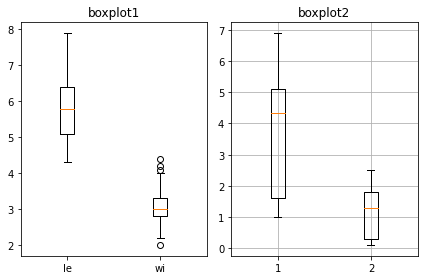

In [33]:
# use matplotlib
plt.subplot(121)
plt.boxplot([iris.SepalLength,iris.SepalWidth],labels=["le","wi"])
plt.title("boxplot1")

plt.subplot(122)
plt.boxplot([iris.PetalLength,iris.PetalWidth])
plt.grid(True)
plt.tight_layout()
plt.title("boxplot2")
plt.show()

#### Q22: Use the built-in pandas plotting tools to make a box-and-whisker plot showing the distribution of petal ratio and sepal ratio for each of the three species. Your plot should have two subplots, one for petal ratio and one for sepal ratio. You may choose the details of your plots (i.e., how to handle outliers, displaying mean vs median, etc) however you think is best. Please include labels on your x- and y-axes and give an appropriate title to your plot.

array([<AxesSubplot:title={'center':'petal ratio'}, xlabel='[Name]'>,
       <AxesSubplot:title={'center':'sepal ratio'}, xlabel='[Name]'>],
      dtype=object)

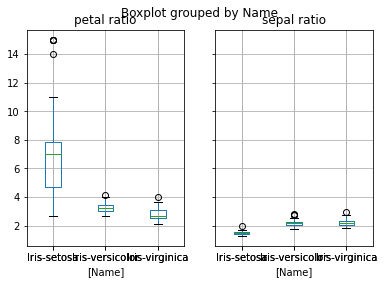

In [3]:
# use pandas
iris['sepal ratio']  = iris['SepalLength']/iris['SepalWidth']
iris['petal ratio'] =  iris['PetalLength']/iris['PetalWidth']
iris[['sepal ratio','petal ratio', 'Name']].boxplot(by = "Name")

<AxesSubplot:>

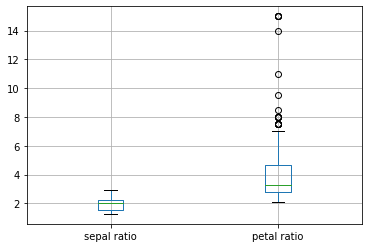

In [4]:
#不加name 看上去是这样的
iris[['sepal ratio','petal ratio']].boxplot()

#### Q23: Use the built-in pandas plotting tools to make a scatter matrix plot for the four original features (petal width, petal length, sepal width and sepal length). Each point in the scatter plot should be colored according to its species. Hint: see the documentation at https://pandas.pydata.org/pandas-docs/stable/visualization.html# scatter-matrix-plot to get started.

array([[<AxesSubplot:xlabel='SepalLength', ylabel='SepalLength'>,
        <AxesSubplot:xlabel='SepalWidth', ylabel='SepalLength'>,
        <AxesSubplot:xlabel='PetalLength', ylabel='SepalLength'>,
        <AxesSubplot:xlabel='PetalWidth', ylabel='SepalLength'>],
       [<AxesSubplot:xlabel='SepalLength', ylabel='SepalWidth'>,
        <AxesSubplot:xlabel='SepalWidth', ylabel='SepalWidth'>,
        <AxesSubplot:xlabel='PetalLength', ylabel='SepalWidth'>,
        <AxesSubplot:xlabel='PetalWidth', ylabel='SepalWidth'>],
       [<AxesSubplot:xlabel='SepalLength', ylabel='PetalLength'>,
        <AxesSubplot:xlabel='SepalWidth', ylabel='PetalLength'>,
        <AxesSubplot:xlabel='PetalLength', ylabel='PetalLength'>,
        <AxesSubplot:xlabel='PetalWidth', ylabel='PetalLength'>],
       [<AxesSubplot:xlabel='SepalLength', ylabel='PetalWidth'>,
        <AxesSubplot:xlabel='SepalWidth', ylabel='PetalWidth'>,
        <AxesSubplot:xlabel='PetalLength', ylabel='PetalWidth'>,
        <AxesSubplot:

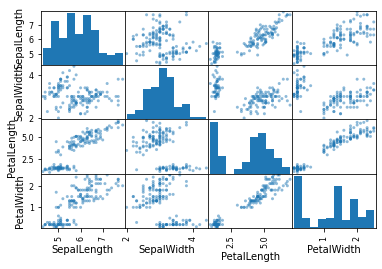

In [19]:
from pandas.plotting import scatter_matrix
scatter_matrix( iris[['SepalLength'	,'SepalWidth',	'PetalLength',	'PetalWidth',"Name"]])

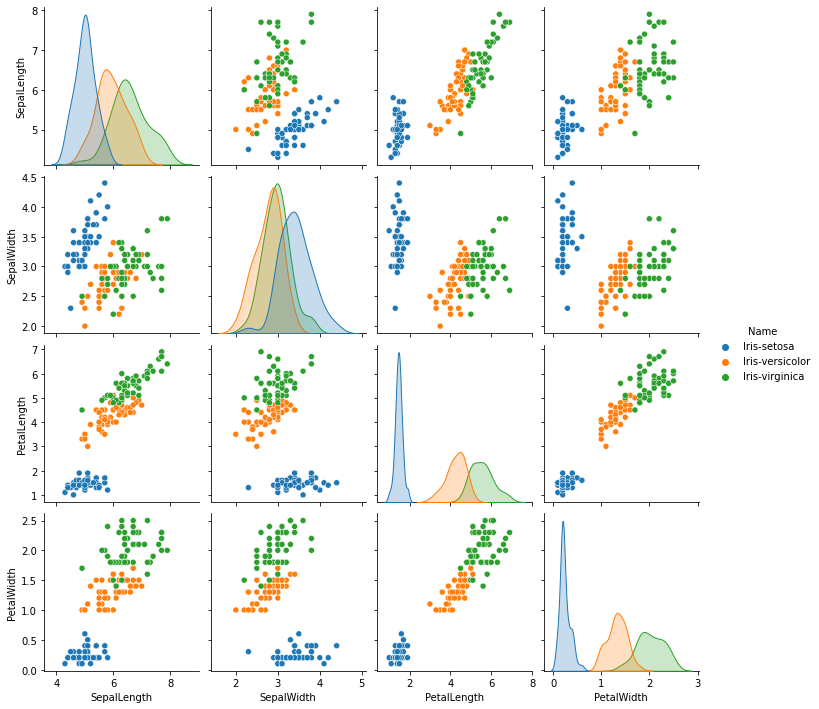

In [21]:
import seaborn as sns
sns.pairplot(iris.iloc[:,0:5], hue = "Name")

## Load the stockprice dataset

In [2]:
import pandas as pd

In [3]:
stock = pd.read_csv("timeseries_stockprice.csv", header=0) #add header
stock.head()

,Date,Amazon,Google,Facebook
0,5/1/18,927.800,901.94,151.74
1,5/2/18,946.645,909.62,153.34
2,5/3/18,946.000,914.86,153.60
3,5/4/18,944.750,926.07,150.17
4,5/7/18,940.520,933.54,151.45


#### Q24-Plotting a single series

To plot a single series, such as the closing stock price for Amazon for each date, you can simple designate the x-axis values as Date and the y-axis values as Amazon and set the kind parameter to line.

<AxesSubplot:xlabel='Date'>

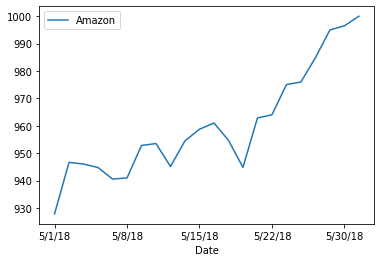

In [25]:
stock.iloc[:,0:2].plot(x= "Date", y = "Amazon")

<AxesSubplot:>

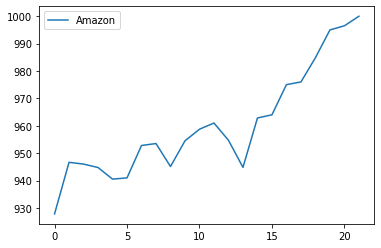

In [5]:
# 也可以不specify
stock.iloc[:,0:2].plot()

#### Q25-Plotting two series

When plotting two series, set the y-axis values to a list containing the two column names, each being a data series.

<AxesSubplot:xlabel='Date'>

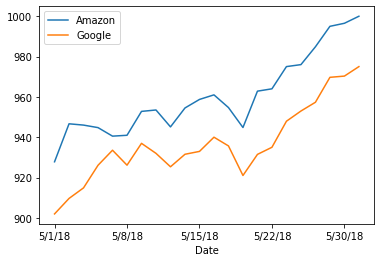

In [27]:
stock.iloc[:,0:3].plot(x="Date")

#### Q26- Plotting three series

When plotting three series, set the y-axis values to a list containing the three column names, each being a data series.

<AxesSubplot:xlabel='Date'>

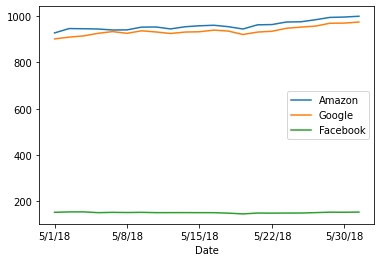

In [29]:
stock.plot(x="Date")

## Load the following dataset

In [33]:
import pandas as pd
mydata = pd.read_csv("mba.csv", header=0, index_col ="School") #add header and index
mydata.head()

,Rank,Country,Average_salary,Pre_Salary,Grad_Jobs,PhD,Avg_Age_Students,Avg_Work_Experience,Tuition,Duration
School,,,,,,,,,,
Chicago (Booth),1,US,113217,63,93,96,27,60,106800,21
Dartmouth (Tuck),2,US,115143,62,97,100,28,60,106980,21
Virginia (Darden),3,US,104478,67,95,97,27,60,107800,21
Harvard,4,US,121785,44,97,94,27,48,107000,18
Columbia,5,US,113340,55,98,97,28,60,111736,20


#### Q27-Plot the Box plot using both approach available in pandas: 

    * .plot
    * .boxplot

<AxesSubplot:>

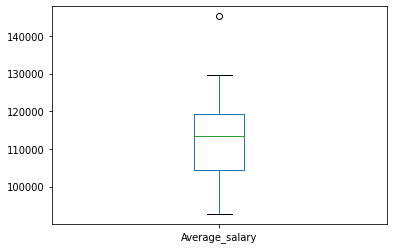

In [49]:
mydata.plot(y="Average_salary",kind = "box")

<AxesSubplot:>

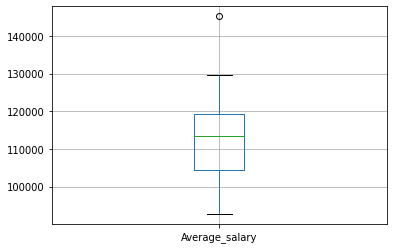

In [39]:
mydata.boxplot("Average_salary")

#### Q28- creat a box plot of two variables: "the average student" and "average work experience" in one graph (side by side)

<AxesSubplot:>

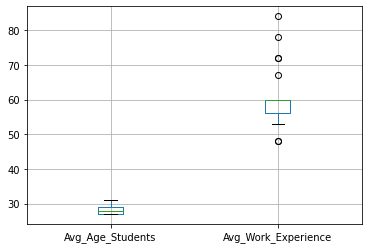

In [43]:
mydata[['Avg_Age_Students','Avg_Work_Experience']].boxplot( )

<AxesSubplot:>

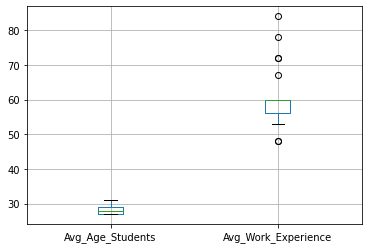

In [47]:
mydata.boxplot(['Avg_Age_Students','Avg_Work_Experience'])

#### Q29- Formatting with .boxplot().
change the following parameters for the previous question as grid=False and fontsize=14:

<AxesSubplot:>

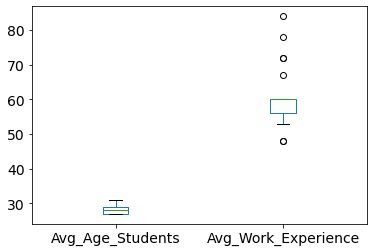

In [50]:
mydata.boxplot(['Avg_Age_Students','Avg_Work_Experience'], fontsize = 14, grid = False)

#### Q30-Histograms
plot the histogram of Tuitions with proper bins

array([[<AxesSubplot:title={'center':'Tuition'}>]], dtype=object)

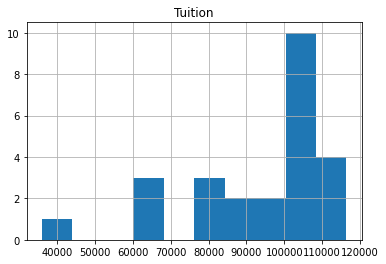

In [51]:
mydata.hist('Tuition')

#### Q31-Scatter plots
plot the scatter plot using Rank (x-axis) and Grad_job (y-axis) and set the proper xlim

<AxesSubplot:xlabel='Rank', ylabel='Grad_Jobs'>

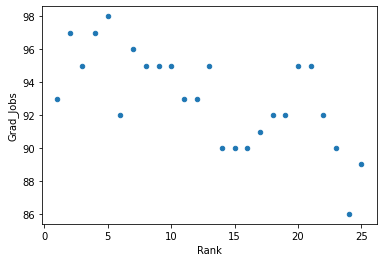

In [54]:
mydata.plot.scatter(x="Rank", y="Grad_Jobs")

#### Q32-Bar charts
plot horrizontal bar graph for Tuition and assign a proper title for your graph - sort your bar graphs in ascending order

In [56]:
mydata['Tuition'].sort_values(ascending = False)

School
MIT (Sloan)                      116400
Stanford                         114600
Northwestern (Kellogg)           113100
Columbia                         111736
Carnegie Mellon (Tepper)         108272
Pennsylvania (Wharton)           107852
Virginia (Darden)                107800
Cornell (Johnson)                107592
Harvard                          107000
Dartmouth (Tuck)                 106980
Chicago (Booth)                  106800
California At Berkeley (Haas)    106792
Michigan (Ross)                  105500
UCLA (Anderson)                  105160
New York (Stern)                  96640
IESE                              95610
London                            92144
Emory (Goizueta)                  87200
IE                                82389
ESADE                             81693
INSEAD                            80719
IMD                               67416
HEC Paris                         66802
York (Schulich)                   61800
Bath                             

<AxesSubplot:title={'center':'Tuition Comparison'}, ylabel='School'>

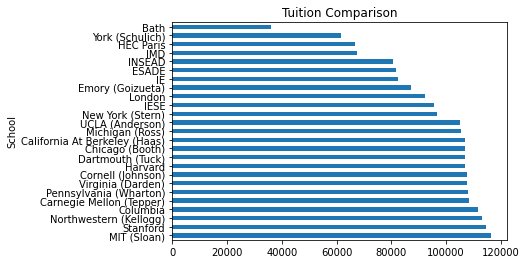

In [68]:
mydata['Tuition'].sort_values(ascending = False).plot.barh(title ='Tuition Comparison')

<AxesSubplot:title={'center':'Tuition Comparison'}, ylabel='School'>

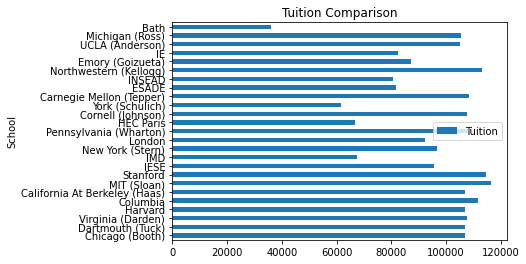

In [71]:
# 这种写法和上面的不一样 需要specify y 
# 和上面boxplot情况类似 boxplot有两种写法 一种不需要specify y 还有一种需要 如下
# mydata.plot(y = "Tuition", kind = "box")
mydata.plot.barh(y="Tuition",title ='Tuition Comparison')

### Q33-Refine the bar chart with a few aesthetic elements.


* The legend parameter is set to False to remove the redundant legend.
* The color parameter can set the color values using RGB. RGB is a way of making colors. You have to provide an amount of red, green and blue + the transparency and it returns a color.
* The edgecolor parameter allows you to set the border of the bars.

In [37]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True}) # keeps labels cutoff
